In [2]:
# loads black auto-formatting in the notebook. Needs black and nb_black installed via pip
%load_ext nb_black
# Allows for libraries to be reloaded on-the-fly.
%load_ext autoreload
%autoreload 2

<IPython.core.display.Javascript object>

# Dimensionality reduction 

The idea here is that we can try dimensionality reduction techniques to boil down a N-Dimensional clustering problem to a 1D clustering problem where the accelerated DBSCAN can then be used.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<IPython.core.display.Javascript object>

In [4]:
from tqdm import tqdm

tqdm.pandas()

<IPython.core.display.Javascript object>

In [5]:
!ls /home/raichu/data/

data  mc_25k.pkl  trk_processed_25k.pkl


<IPython.core.display.Javascript object>

In [6]:
storage_path = "/home/raichu/data/"
trk = pd.read_pickle(storage_path + "trk_processed_25k.pkl")

<IPython.core.display.Javascript object>

In [7]:
mc = pd.read_pickle(storage_path + "mc_25k.pkl")

<IPython.core.display.Javascript object>

In [8]:
trk.head()

trk_pt   trk_eta   trk_phi  trk_d0    trk_z0  trk_fake  \
entry subentry                                                             
0     0         2.623967  1.301414 -0.289234   999.0 -0.878906         2   
      1         3.435026  0.566814 -0.159267   999.0  3.339844         2   
      2         3.774908  1.815973 -0.240375   999.0  4.921875         1   
      3         2.641448 -1.435747 -0.128747   999.0 -0.468750         2   
      4         2.320653  1.837421  0.032604   999.0  4.980469         1   

                is_pv  
entry subentry         
0     0             0  
      1             0  
      2             1  
      3             0  
      4             1

<IPython.core.display.Javascript object>

In [9]:
def plot_cluster_2d(
    df: pd.DataFrame, x: str = "trk_z0", y: str = "trk_phi", entry_num: int = 0
):
    _df = df.query(f"entry == {entry_num}")
    sns.scatterplot(data=_df, x=x, y=y, hue="is_pv")

<IPython.core.display.Javascript object>

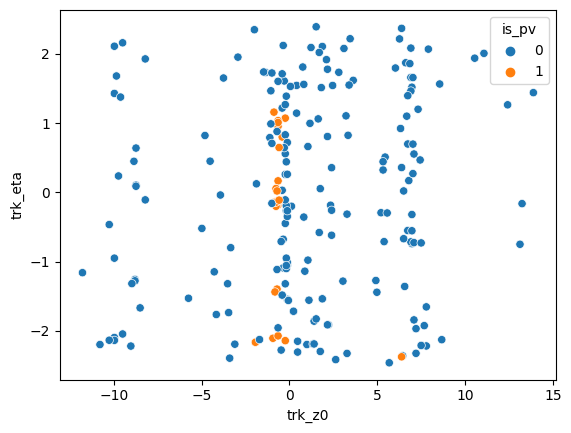

<IPython.core.display.Javascript object>

In [10]:
plot_cluster_2d(trk, x="trk_z0", y="trk_eta", entry_num=6)

### Let's create a training and testing dataset to make it fair

In [11]:
trk = trk.reset_index()

<IPython.core.display.Javascript object>

In [12]:
trk = trk.rename(columns={"entry": "event_number", "subentry": "track_number"})

<IPython.core.display.Javascript object>

In [13]:
import random

<IPython.core.display.Javascript object>

In [14]:
rng = np.random.default_rng()

<IPython.core.display.Javascript object>

In [15]:
trk.tail()

,event_number,track_number,trk_pt,trk_eta,trk_phi,trk_d0,trk_z0,trk_fake,is_pv
4562531,24999,194,2.807081,-2.373757,-0.638281,999.0,-0.058594,2,0
4562532,24999,195,2.472056,-2.244333,-0.792948,999.0,6.328125,2,0
4562533,24999,196,2.391643,-2.093290,-0.658689,999.0,-0.410156,2,0
4562534,24999,197,6.140490,2.403961,-0.539389,999.0,-7.441406,2,0
4562535,24999,198,5.962409,-2.311289,-0.428627,999.0,1.640625,2,0


<IPython.core.display.Javascript object>

In [16]:
idx = np.arange(0, 25000)

<IPython.core.display.Javascript object>

In [17]:
np.random.shuffle(idx)

<IPython.core.display.Javascript object>

In [18]:
idx_train = idx[:12500]
idx_test = idx[12500:]

<IPython.core.display.Javascript object>

In [19]:
idx_train

array([19251, 22222, 18495, ...,  9820,  7560, 21274])

<IPython.core.display.Javascript object>

In [20]:
idx_test

array([24419, 15875,  3440, ...,  7816, 15872, 11456])

<IPython.core.display.Javascript object>

In [21]:
trk_train = trk.loc[trk.event_number.isin(idx_train)].copy()

<IPython.core.display.Javascript object>

In [22]:
trk_test = trk.loc[trk.event_number.isin(idx_test)].copy()

<IPython.core.display.Javascript object>

## Train the u-map transform (consumes too much memory!)

Let's use the three spatial coordinates, `trk_z0`, `trk_eta`, `trk_phi` to train the umap transform

In [21]:
# import umap

<IPython.core.display.Javascript object>

In [22]:
# fit = umap.UMAP(n_components=1)

<IPython.core.display.Javascript object>

In [23]:
# u = fit.fit_transform(trk_train[['trk_z0','trk_eta','trk_phi']].values)

<IPython.core.display.Javascript object>

# Train a PCA transform

In [23]:
from sklearn.decomposition import PCA

<IPython.core.display.Javascript object>

In [24]:
pca = PCA(n_components=1)

<IPython.core.display.Javascript object>

In [25]:
pca.fit(trk_train[["trk_z0", "trk_eta", "trk_phi"]].values)

PCA(n_components=1)

<IPython.core.display.Javascript object>

In [26]:
y_train = pca.transform(trk_train[["trk_z0", "trk_eta", "trk_phi"]].values)

<IPython.core.display.Javascript object>

In [27]:
trk_train["pca_1"] = y_train

<IPython.core.display.Javascript object>

In [28]:
trk_train

,event_number,track_number,trk_pt,trk_eta,trk_phi,trk_d0,trk_z0,trk_fake,is_pv,pca_1
0,0,0,2.623967,1.301414,-0.289234,999.0,-0.878906,2,0,0.891175
1,0,1,3.435026,0.566814,-0.159267,999.0,3.339844,2,0,-3.331016
2,0,2,3.774908,1.815973,-0.240375,999.0,4.921875,1,1,-4.907138
3,0,3,2.641448,-1.435747,-0.128747,999.0,-0.468750,2,0,0.468118
4,0,4,2.320653,1.837421,0.032604,999.0,4.980469,1,1,-4.965705
...,...,...,...,...,...,...,...,...,...,...
4562531,24999,194,2.807081,-2.373757,-0.638281,999.0,-0.058594,2,0,0.053701
4562532,24999,195,2.472056,-2.244333,-0.792948,999.0,6.328125,2,0,-6.332296
4562533,24999,196,2.391643,-2.093290,-0.658689,999.0,-0.410156,2,0,0.406583
4562534,24999,197,6.140490,2.403961,-0.539389,999.0,-7.441406,2,0,7.458853


<IPython.core.display.Javascript object>

In [29]:
trk_test["pca_1"] = pca.transform(trk_test[["trk_z0", "trk_eta", "trk_phi"]].values)

<IPython.core.display.Javascript object>

In [30]:
trk_test

,event_number,track_number,trk_pt,trk_eta,trk_phi,trk_d0,trk_z0,trk_fake,is_pv,pca_1
159,1,0,2.085667,0.266370,-0.245917,999.0,-2.578125,2,0,2.585500
160,1,1,3.187484,0.757485,-0.190312,999.0,2.812500,2,0,-2.802773
161,1,2,2.119512,-0.136296,-0.057751,999.0,-4.042969,2,0,4.048383
162,1,3,4.098193,0.348379,-0.048535,999.0,-0.410156,2,0,0.417886
163,1,4,2.350128,0.005859,-0.134058,999.0,-4.218750,2,0,4.224852
...,...,...,...,...,...,...,...,...,...,...
4562332,24998,185,4.531431,0.222762,-0.767229,999.0,-4.218750,1,1,4.226047
4562333,24998,186,2.781760,0.172964,-0.681181,999.0,-5.273438,1,1,5.280465
4562334,24998,187,1.970887,-2.213576,-1.162888,999.0,4.218750,2,0,-4.222696
4562335,24998,188,1.956645,-2.179688,-0.977764,999.0,11.894531,2,0,-11.898286


<IPython.core.display.Javascript object>

### t-SNE takes too long.

# Test run of DBSCAN

Lets test it with the first event

In [40]:
e1 = trk_train.loc[trk_train.event_number == 0].copy()

<IPython.core.display.Javascript object>

In [32]:
from sklearn.cluster import DBSCAN

<IPython.core.display.Javascript object>

In [41]:
e1

,event_number,track_number,trk_pt,trk_eta,trk_phi,trk_d0,trk_z0,trk_fake,is_pv,pca_1
0,0,0,2.623967,1.301414,-0.289234,999.0,-0.878906,2,0,0.891175
1,0,1,3.435026,0.566814,-0.159267,999.0,3.339844,2,0,-3.331016
2,0,2,3.774908,1.815973,-0.240375,999.0,4.921875,1,1,-4.907138
3,0,3,2.641448,-1.435747,-0.128747,999.0,-0.468750,2,0,0.468118
4,0,4,2.320653,1.837421,0.032604,999.0,4.980469,1,1,-4.965705
...,...,...,...,...,...,...,...,...,...,...
154,0,154,2.026653,-2.021094,-1.062191,999.0,-0.410156,2,0,0.407035
155,0,155,2.049097,-2.055119,-0.964472,999.0,-0.410156,2,0,0.406848
156,0,156,2.222179,-2.426809,-0.693084,999.0,5.566406,2,0,-5.571471
157,0,157,2.563973,2.081842,-0.530004,999.0,-3.046875,2,0,3.062854


<IPython.core.display.Javascript object>

In [42]:
_df = pd.DataFrame({})
_df["z0"] = e1["trk_z0"]
_df["pt"] = e1["trk_pt"]
_df["pca_1"] = e1["pca_1"]

<IPython.core.display.Javascript object>

In [43]:
e1.head()

,event_number,track_number,trk_pt,trk_eta,trk_phi,trk_d0,trk_z0,trk_fake,is_pv,pca_1
0,0,0,2.623967,1.301414,-0.289234,999.0,-0.878906,2,0,0.891175
1,0,1,3.435026,0.566814,-0.159267,999.0,3.339844,2,0,-3.331016
2,0,2,3.774908,1.815973,-0.240375,999.0,4.921875,1,1,-4.907138
3,0,3,2.641448,-1.435747,-0.128747,999.0,-0.468750,2,0,0.468118
4,0,4,2.320653,1.837421,0.032604,999.0,4.980469,1,1,-4.965705


<IPython.core.display.Javascript object>

eps = 0.1 is a total guess based on having roughly same amount of divisions as in the z0 space.

In [44]:
_db = DBSCAN(eps=0.1, min_samples=2).fit(_df["pca_1"].values.reshape(-1, 1)) 


<IPython.core.display.Javascript object>

In [45]:
_df["label"] = _db.labels_

<IPython.core.display.Javascript object>

In [46]:
clusters = _df.groupby("label").agg({"z0": ["median"], "pt": ["sum"]})
clusters.columns = ["z0", "pt"]

<IPython.core.display.Javascript object>

In [47]:
clusters = clusters.sort_values(by="pt", ascending=False)

<IPython.core.display.Javascript object>

In [48]:
clusters

,z0,pt
label,,
1,4.980469,84.025032
-1,1.699219,54.307575
5,-1.875000,44.067730
12,2.460938,32.853683
0,-0.996094,32.500057
2,-0.468750,27.201271
8,-3.046875,26.086596
4,-3.662109,24.711147
6,5.625000,18.436743


<IPython.core.display.Javascript object>

In [49]:
mc.query("entry==1")

,,pv_L1reco_z0,pv_L1reco_sum,pv_MC
entry,subentry,,,
1,0,-2.02108,90.041313,-3.608661


<IPython.core.display.Javascript object>

Seems to have worked particularly well. I'm slightly amazed by this single event, however it definetly needs to get expanded further.

# Running over all the training set

In [50]:
mc = mc.reset_index()

<IPython.core.display.Javascript object>

In [51]:
mc = mc.rename(columns={"entry": "event_number"})

<IPython.core.display.Javascript object>

In [52]:
mc.head()

,event_number,subentry,pv_L1reco_z0,pv_L1reco_sum,pv_MC
0,0,0,5.026911,79.777252,5.055163
1,1,0,-2.021080,90.041313,-3.608661
2,2,0,-0.141508,202.421341,-0.261453
3,3,0,2.744174,303.983124,2.803285
4,4,0,-1.279072,218.012939,-1.400667


<IPython.core.display.Javascript object>

In [53]:
mc_train = mc.loc[mc.event_number.isin(idx_train), "pv_MC"].copy()

<IPython.core.display.Javascript object>

In [54]:
mc_test = mc.loc[mc.event_number.isin(idx_test), "pv_MC"].copy()

<IPython.core.display.Javascript object>

In [55]:
def db_fit(X, z0, pt, eps=0.1):
    _df = pd.DataFrame({})
    _df["z0"] = z0
    _df["pt"] = pt
    _df["X"] = X
    _db = DBSCAN(eps=eps, min_samples=2).fit(_df["X"].values.reshape(-1, 1))

    _df["label"] = _db.labels_
    _df.loc[_df["label"] < 0, "pt"] = 0
    pv_label = _df.groupby(["label"])["pt"].sum().sort_values(ascending=False).index[0]
    _df["pv_label"] = 0
    _df.loc[_df["label"] == pv_label, "pv_label"] = 1

    z0_reco = np.median(_df.loc[_df["pv_label"] == 1, "z0"])

    return z0_reco

<IPython.core.display.Javascript object>

In [56]:
def db_run_fit(tracks, X="pca_1", eps=0.1):
    pv_db = tracks.groupby(["event_number"]).progress_apply(
        lambda x: db_fit(tracks[X], tracks["trk_z0"], tracks["trk_pt"], eps=eps)
    )
    return pv_db

<IPython.core.display.Javascript object>

In [57]:
trk_small_test = trk_train.loc[trk_train.event_number < 20].copy()

<IPython.core.display.Javascript object>

In [58]:
train_event_number = trk_train.event_number.unique()

<IPython.core.display.Javascript object>

In [59]:
count = 0
pv_z0s = []
for i in tqdm(train_event_number):
    _df = trk_train.loc[trk_train.event_number == i]

    pv_z0 = db_fit(
        _df["pca_1"].values, _df["trk_z0"].values, _df["trk_pt"].values, eps=0.1
    )
    
    pv_z0s.append(pv_z0)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12500/12500 [03:44<00:00, 55.60it/s]


<IPython.core.display.Javascript object>

In [60]:
pv_z0s_test = []
test_event_number = trk_test.event_number.unique()
for i in tqdm(test_event_number):
    _df = trk_test.loc[trk_test.event_number == i]

    pv_z0 = db_fit(
        _df["pca_1"].values, _df["trk_z0"].values, _df["trk_pt"].values, eps=0.1
    )
    
    pv_z0s_test.append(pv_z0)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12500/12500 [04:01<00:00, 51.70it/s]


<IPython.core.display.Javascript object>

In [61]:
results_train=pd.DataFrame({})
results_train['mc'] = mc_train
results_train['db'] = pv_z0s
results_train['diff'] = np.abs(results_train['mc'] - results_train['db'])
results_train['reco'] = results_train['diff'] < 0.1


<IPython.core.display.Javascript object>

In [62]:
results_test=pd.DataFrame({})
results_test['mc'] = mc_test
results_test['db'] = pv_z0s_test
results_test['diff'] = np.abs(results_test['mc'] - results_test['db'])
results_test['reco'] = results_test['diff'] < 0.1


<IPython.core.display.Javascript object>

In [63]:
100 * results_test["reco"].sum() / results_test.shape[0]

74.448

<IPython.core.display.Javascript object>

So it seems that it can be done, but i'm pretty sure PCA has basically ignored the other dimensions and reconstructed z0

In [64]:
pca.

SyntaxError: invalid syntax (3275565107.py, line 1)

ERROR:root:Cannot parse: 1:4: pca.
Traceback (most recent call last):
  File "/home/raichu/miniconda3/envs/db/lib/python3.9/site-packages/lab_black.py", line 218, in format_cell
    formatted_code = _format_code(cell)
  File "/home/raichu/miniconda3/envs/db/lib/python3.9/site-packages/lab_black.py", line 29, in _format_code
    return format_str(src_contents=code, mode=FileMode())
  File "src/black/__init__.py", line 1067, in format_str
  File "src/black/__init__.py", line 1077, in _format_str_once
  File "src/black/parsing.py", line 126, in lib2to3_parse
black.parsing.InvalidInput: Cannot parse: 1:4: pca.


In [65]:
pca.singular_values_

array([6598.1484], dtype=float32)

<IPython.core.display.Javascript object>

In [66]:
pca.explained_variance_ratio_

array([0.78599903])

<IPython.core.display.Javascript object>

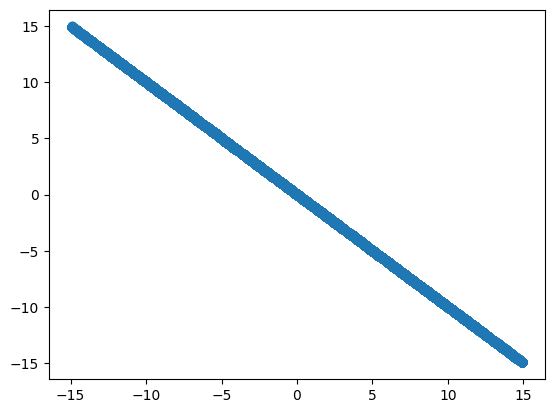

<IPython.core.display.Javascript object>

In [67]:
plt.scatter(trk_train["trk_z0"].values, trk_train["pca_1"].values)

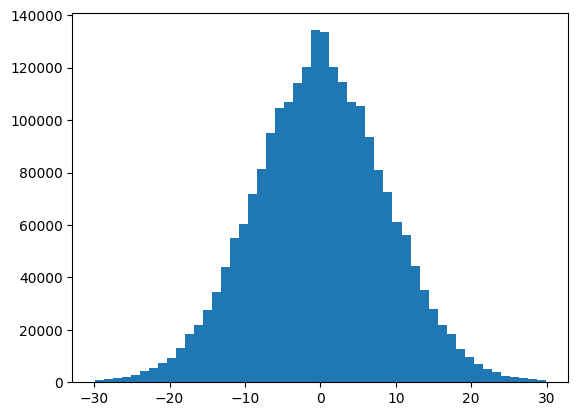

<IPython.core.display.Javascript object>

In [68]:
_ = plt.hist(trk_train["trk_z0"] - trk_train["pca_1"], bins=50)

Ok so, where do we go from here? 

Is it that the particular problem we are trying to solve is fully described by the z0 dimension and the other dimensions are not adding any further information? 
- Do we need to try a more complicated autoencoder that might better capture the three dimensions into the latent space?
- Do we need to try this application in with a different dataset, maybe something that is truly a 2D clustering problem? 
- What happens if we add $p_T$ to the problem?
- Do I need to try something more dificult like a sequence to sequence auto encoder? 

## 2D Example applications (toy dataset)

In [183]:
from sklearn.datasets import make_blobs

<IPython.core.display.Javascript object>

In [210]:
x, y = make_blobs(n_samples=10000, centers=20, n_features=2, random_state=0)

<IPython.core.display.Javascript object>

In [211]:
x.shape

(10000, 2)

<IPython.core.display.Javascript object>

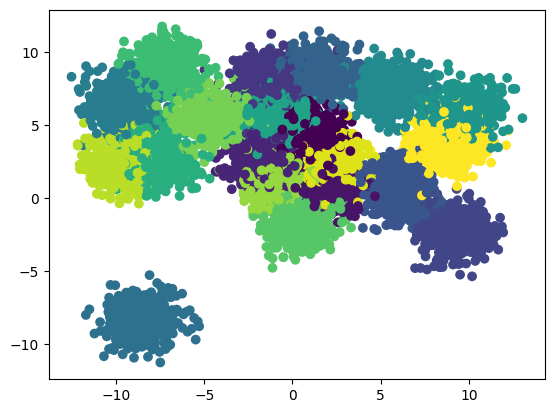

<IPython.core.display.Javascript object>

In [212]:
plt.scatter(x[:, 0], x[:, 1], c=y)

Can we use this to form the basis of our approach?

We can use the labels `y` to determine what cluster the point belongs to, then we can use the coordinates in `x` to determine the cluster center. This can be expanded to N-dimensions if necessary.

In [1]:
x

NameError: name 'x' is not defined

# Autoencoder example

In [214]:
import tensorflow as tf

2022-11-10 14:54:21.853738: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-10 14:54:22.133935: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-10 14:54:22.133984: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-11-10 14:54:22.188469: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-11-10 14:54:23.199329: W tensorflow/stream_executor/platform/de

<IPython.core.display.Javascript object>

In [215]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

<IPython.core.display.Javascript object>

In [264]:
from sklearn.preprocessing import StandardScaler

<IPython.core.display.Javascript object>

In [265]:
scaler = StandardScaler()

<IPython.core.display.Javascript object>

In [217]:
X_train = trk_train[["trk_z0", "trk_eta", "trk_phi"]].values
X_test = trk_test[["trk_z0", "trk_eta", "trk_phi"]].values

<IPython.core.display.Javascript object>

In [266]:
scaled = scaler.fit(X_train)

<IPython.core.display.Javascript object>

In [269]:
X_train_sc = scaled.transform(X_train)
X_test_sc = scaled.transform(X_test)

<IPython.core.display.Javascript object>

In [274]:
latent_dim = 1


class Autoencoder(Model):
    def __init__(self, latent_dim):
        super(Autoencoder, self).__init__()
        self.latent_dim = latent_dim
        self.encoder = tf.keras.Sequential(
            [
                layers.InputLayer(input_shape=(3)),
                layers.Dense(20, activation="relu"),
                layers.Dense(10, activation="relu"),
                #                 layers.Dense(5, activation="relu"),
                layers.Dense(latent_dim, activation="relu"),
            ]
        )
        self.decoder = tf.keras.Sequential(
            [
                layers.InputLayer(input_shape=(1)),
                layers.Dense(5, activation="linear"),
                layers.Dense(10, activation="linear"),
                #                 layers.Dense(20, activation="linear"),
                layers.Dense(3, activation="sigmoid"),
            ]
        )

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded


autoencoder = Autoencoder(latent_dim)

<IPython.core.display.Javascript object>

In [275]:
autoencoder.compile(optimizer='adam', loss= losses.MeanSquaredError())


<IPython.core.display.Javascript object>

In [276]:
autoencoder.fit(
    X_train_sc,
    X_train_sc,
    epochs=3,
    shuffle=True,
    validation_data=(X_test_sc, X_test_sc),
    batch_size=150,
)

Epoch 1/3
15191/15191 [==============================] - 62s 4ms/step - loss: 0.7528 - val_loss: 0.7374
Epoch 2/3
15191/15191 [==============================] - 79s 5ms/step - loss: 0.7417 - val_loss: 0.7372
Epoch 3/3
15191/15191 [==============================] - 61s 4ms/step - loss: 0.7411 - val_loss: 0.7352


<IPython.core.display.Javascript object>

In [254]:
print("hi")

hi


<IPython.core.display.Javascript object>

In [277]:
autoencoder.summary()

Model: "autoencoder_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_14 (Sequential)  (None, 1)                 301       
                                                                 
 sequential_15 (Sequential)  (None, 3)                 103       
                                                                 
Total params: 404
Trainable params: 404
Non-trainable params: 0
_________________________________________________________________


<IPython.core.display.Javascript object>

In [230]:
print(reco_train)

[[1.4051719e-09 1.8363735e-21 2.8953789e-06]
 [9.9999923e-01 4.4843471e-08 3.2370608e-05]
 [8.6903466e-14 3.1263332e-25 1.4673828e-06]
 ...
 [9.9999923e-01 4.4843471e-08 3.2370608e-05]
 [9.9999923e-01 4.4843471e-08 3.2370608e-05]
 [1.7276456e-17 1.5143736e-28 8.0713374e-07]]


<IPython.core.display.Javascript object>

In [280]:
encode_train = autoencoder.encoder.predict(X_train_sc, batch_size=150)

15191/15191 [==============================] - 22s 1ms/step


<IPython.core.display.Javascript object>

In [281]:
encode_train

array([[ 0.58657545],
       [ 0.5681525 ],
       [ 0.7011547 ],
       ...,
       [23.590117  ],
       [21.38147   ],
       [20.632826  ]], dtype=float32)

<IPython.core.display.Javascript object>

In [234]:
encode_train.shape

(2278634, 1)

<IPython.core.display.Javascript object>

In [282]:
trk_train["auto_1"] = encode_train

<IPython.core.display.Javascript object>

In [283]:
trk_train

,event_number,track_number,trk_pt,trk_eta,trk_phi,trk_d0,trk_z0,trk_fake,is_pv,pca_1,auto_1
159,1,0,2.085667,0.266370,-0.245917,999.0,-2.578125,2,0,-2.578088,0.586575
160,1,1,3.187484,0.757485,-0.190312,999.0,2.812500,2,0,2.810160,0.568152
161,1,2,2.119512,-0.136296,-0.057751,999.0,-4.042969,2,0,-4.041079,0.701155
162,1,3,4.098193,0.348379,-0.048535,999.0,-0.410156,2,0,-0.410582,0.582385
163,1,4,2.350128,0.005859,-0.134058,999.0,-4.218750,2,0,-4.217504,0.594477
...,...,...,...,...,...,...,...,...,...,...,...
4562332,24998,185,4.531431,0.222762,-0.767229,999.0,-4.218750,1,1,-4.218348,0.588268
4562333,24998,186,2.781760,0.172964,-0.681181,999.0,-5.273438,1,1,-5.272814,0.589564
4562334,24998,187,1.970887,-2.213576,-1.162888,999.0,4.218750,2,0,4.230592,23.590117
4562335,24998,188,1.956645,-2.179688,-0.977764,999.0,11.894531,2,0,11.906079,21.381470


<IPython.core.display.Javascript object>

In [284]:
trk_train

,event_number,track_number,trk_pt,trk_eta,trk_phi,trk_d0,trk_z0,trk_fake,is_pv,pca_1,auto_1
159,1,0,2.085667,0.266370,-0.245917,999.0,-2.578125,2,0,-2.578088,0.586575
160,1,1,3.187484,0.757485,-0.190312,999.0,2.812500,2,0,2.810160,0.568152
161,1,2,2.119512,-0.136296,-0.057751,999.0,-4.042969,2,0,-4.041079,0.701155
162,1,3,4.098193,0.348379,-0.048535,999.0,-0.410156,2,0,-0.410582,0.582385
163,1,4,2.350128,0.005859,-0.134058,999.0,-4.218750,2,0,-4.217504,0.594477
...,...,...,...,...,...,...,...,...,...,...,...
4562332,24998,185,4.531431,0.222762,-0.767229,999.0,-4.218750,1,1,-4.218348,0.588268
4562333,24998,186,2.781760,0.172964,-0.681181,999.0,-5.273438,1,1,-5.272814,0.589564
4562334,24998,187,1.970887,-2.213576,-1.162888,999.0,4.218750,2,0,4.230592,23.590117
4562335,24998,188,1.956645,-2.179688,-0.977764,999.0,11.894531,2,0,11.906079,21.381470


<IPython.core.display.Javascript object>

In [285]:
count = 0
pv_z0s_auto = []
for i in tqdm(train_event_number):
    _df = trk_train.loc[trk_train.event_number == i]

    pv_z0 = db_fit(
        _df["auto_1"].values, _df["trk_z0"].values, _df["trk_pt"].values, eps=0.1
    )
    
    pv_z0s_auto.append(pv_z0)


100%|████████████████████████████████████████████████████████████████████████████████████████████| 12500/12500 [02:53<00:00, 71.93it/s]


<IPython.core.display.Javascript object>

In [287]:
results_train["auto"] = pv_z0s_auto

<IPython.core.display.Javascript object>

In [288]:
results_train

,mc,db,diff,reco,auto
1,-3.608661,-3.603516,0.005146,True,-1.933594
2,-0.261453,-0.175781,0.085672,True,0.146484
3,2.803285,2.753906,0.049379,True,-0.585938
7,-5.478010,-5.449219,0.028791,True,-0.410156
8,1.570426,1.582031,0.011605,True,1.435547
...,...,...,...,...,...
24988,2.274138,2.109375,0.164763,False,-1.054688
24989,-6.207245,-1.757812,4.449432,False,-1.113281
24991,-0.332746,-0.234375,0.098371,True,-0.351562
24994,1.495518,-0.937500,2.433018,False,-0.468750


<IPython.core.display.Javascript object>

# Sequence to Sequence Autoencoder

In [304]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from keras.utils import plot_model

<IPython.core.display.Javascript object>

In [295]:
e0 = trk_train.loc[trk_train.event_number == 1, "trk_z0"]

<IPython.core.display.Javascript object>

In [300]:
e0 = np.append(e0, 21 * np.ones(250 - e0.shape[0]))

<IPython.core.display.Javascript object>

In [302]:
seq_in = e0.reshape((1, 250, 1))

<IPython.core.display.Javascript object>

In [303]:
seq_out = seq_in

<IPython.core.display.Javascript object>

In [ ]:

model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(250, 1)))
model.add(RepeatVector(250))
model.add(TimeDistributed(den))